In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.contingency_tables import cochrans_q, mcnemar

## Data processing

In [23]:
#Importer dataset
df = pd.read_csv('LLM_Dataset.csv')
df = df[0:132]
df

,Question number,ChatGPT,Gemini,Perplexity,Claude,Correct answers,Eksamenssæt
0,1.0,A,B,C,B,B,"""Maj 2020"""
1,2.0,C,C,A,A,A,NaN
2,3.0,B,A,B,B,A,NaN
3,4.0,A,A,A,A,A,NaN
4,5.0,D,E,C,C,C,NaN
...,...,...,...,...,...,...,...
127,12.0,A,A,A,D,A,NaN
128,13.0,A,A,A,A,A,NaN
129,14.0,A,A,B,A,A+B,NaN
130,15.0,A,A,E,C,D,NaN


In [24]:
#Calculate all correct answers
GPT4o_correct = df['ChatGPT']==df['Correct answers']
Gemini_correct = df['Gemini']==df['Correct answers']
Perplexity_correct = df['Perplexity']==df['Correct answers']
Claude_correct = df['Claude']==df['Correct answers']

#Example of correct list
print(GPT4o_correct[0:10])
len(GPT4o_correct)

0    False
1    False
2    False
3     True
4    False
5     True
6     True
7     True
8    False
9     True
dtype: bool


132

## Data evaluation

In [25]:
#Calculate and print accuracy for each LLM
print("ChatGPT 4o accuracy:", np.mean(GPT4o_correct))
print("Gemini accuracy:", np.mean(Gemini_correct))
print("Perplexity accuracy:", np.mean(Perplexity_correct))
print("Claude accuracy:", np.mean(Claude_correct))

ChatGPT 4o accuracy: 0.6590909090909091
Gemini accuracy: 0.7045454545454546
Perplexity accuracy: 0.6818181818181818
Claude accuracy: 0.5984848484848485


In [28]:
#Calculate upper and lower bound of 95% confidensintercal
print("ChatGPT 4o upper and lower bound:",proportion_confint(np.sum(GPT4o_correct), len(GPT4o_correct)))
print("Gemini upper and lower bound:",proportion_confint(np.sum(Gemini_correct), len(Gemini_correct)))
print("Perplexity upper and lower bound:",proportion_confint(np.sum(Perplexity_correct), len(Perplexity_correct)))
print("Claude upper and lower bound:",proportion_confint(np.sum(Claude_correct), len(Claude_correct)))

ChatGPT 4o upper and lower bound: (0.578227308077091, 0.7399545101047271)
Gemini upper and lower bound: (0.6267129560369156, 0.7823779530539936)
Perplexity upper and lower bound: (0.6023610115877481, 0.7612753520486154)
Claude upper and lower bound: (0.5148593586497512, 0.6821103383199458)


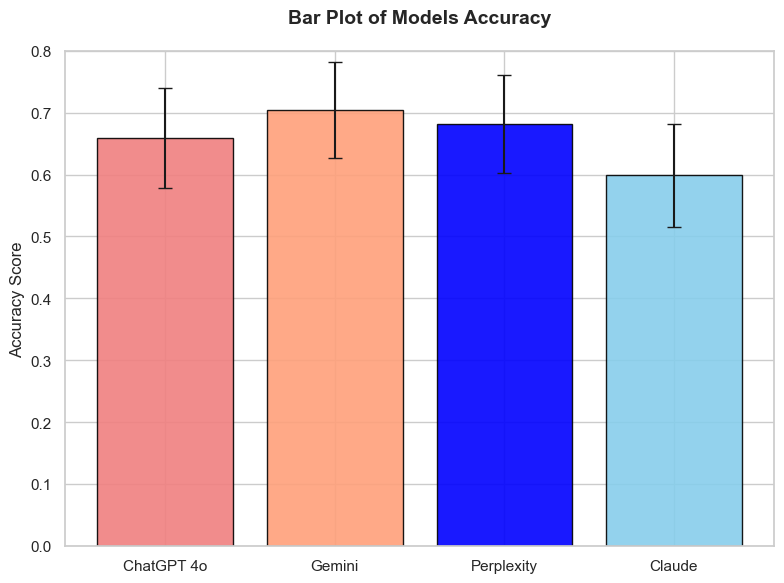

In [ ]:
#Data
models = ['ChatGPT 4o', 'Gemini', 'Perplexity', 'Claude']
accuracy = [0.6590909, 0.7045455, 0.6818182, 0.5984848]
lower_bound = [0.578226, 0.626712, 0.602360, 0.5148594]
upper_bound = [0.739956, 0.782379, 0.761277, 0.6821103]

#Calculate the errors
error = [upper - acc for upper, acc in zip(upper_bound, accuracy)]

#Set the Seaborn style
sns.set(style="whitegrid")
colors = ['#F08080', '#FFA07A', '#0000FF', '#87CEEB']  

#Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(
    models, 
    accuracy, 
    yerr=error, 
    capsize=5, 
    color=colors, 
    edgecolor="black", 
    alpha=0.9
)

#Customize the plot
plt.ylim(0, 0.8)
plt.ylabel('Accuracy Score', fontsize=12)
plt.title('Bar Plot of Models Accuracy', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()

#Show the plot
plt.show()


In [34]:
print(cochrans_q([GPT4o_correct,Gemini_correct,Perplexity_correct,Claude_correct]))

df          131
pvalue      1.8969512051446187e-15
statistic   301.3363208459604


In [35]:
Posthoc = pd.crosstab(GPT4o_correct, Gemini_correct)
print(mcnemar(Posthoc))

Posthoc = pd.crosstab(GPT4o_correct, Perplexity_correct)
print(mcnemar(Posthoc))

Posthoc = pd.crosstab(GPT4o_correct, Claude_correct)
print(mcnemar(Posthoc))

Posthoc = pd.crosstab(Gemini_correct, Perplexity_correct)
print(mcnemar(Posthoc))

Posthoc = pd.crosstab(Gemini_correct, Claude_correct)
print(mcnemar(Posthoc))

Posthoc = pd.crosstab(Perplexity_correct, Claude_correct)
print(mcnemar(Posthoc))

pvalue      0.36159460805356514
statistic   12.0
pvalue      0.6900379657745361
statistic   11.0
pvalue      0.22948101302608848
statistic   13.0
pvalue      0.755228657504631
statistic   19.0
pvalue      0.03355243967962451
statistic   12.0
pvalue      0.08953107893466952
statistic   12.0


## Accuracies testing

In [47]:
# Initialize counters
GPT4o_Perplexity_correct = 0
GPT4o_Perplexity_wrong = 0

GPT4o_Claude_correct = 0
GPT4o_Claude_wrong = 0

Perplexity_Claude_correct = 0
Perplexity_Claude_wrong = 0

All_3_correct = 0
All_3_wrong = 0

# Iterate through the DataFrame rows
for index, row in df.iterrows():
    # Check conditions and increment counters accordingly
    if row['ChatGPT'] == row['Perplexity'] == row['Correct answers'] and row['Claude'] != row['Correct answers']:
        GPT4o_Perplexity_correct += 1
    elif row['ChatGPT'] != row['Correct answers'] and row['Perplexity'] != row['Correct answers'] and row['Claude'] == row['Correct answers']:
        GPT4o_Perplexity_wrong += 1
    elif row['ChatGPT'] == row['Claude'] == row['Correct answers'] and row['Perplexity'] != row['Correct answers']:
        GPT4o_Claude_correct += 1
    elif row['ChatGPT'] != row['Correct answers'] and row['Claude'] != row['Correct answers'] and row['Perplexity'] == row['Correct answers']:
        GPT4o_Claude_wrong += 1
    elif row['Perplexity'] == row['Claude'] == row['Correct answers'] and row['ChatGPT'] != row['Correct answers']:
        Perplexity_Claude_correct += 1
    elif row['Perplexity'] != row['Correct answers'] and row['Claude'] != row['Correct answers'] and row['ChatGPT'] == row['Correct answers']:
        Perplexity_Claude_wrong += 1
    elif row['ChatGPT'] == row['Perplexity'] == row['Claude'] == row['Correct answers']:
        All_3_correct += 1
    elif row['ChatGPT'] != row['Correct answers'] and row['Perplexity'] != row['Correct answers'] and row['Claude'] != row['Correct answers']:
        All_3_wrong += 1

print(GPT4o_Perplexity_correct,GPT4o_Perplexity_wrong)

print(GPT4o_Claude_correct,GPT4o_Claude_wrong)

print(Perplexity_Claude_correct, Perplexity_Claude_wrong)

print(All_3_correct, All_3_wrong)


16 6
6 7
7 5
60 25


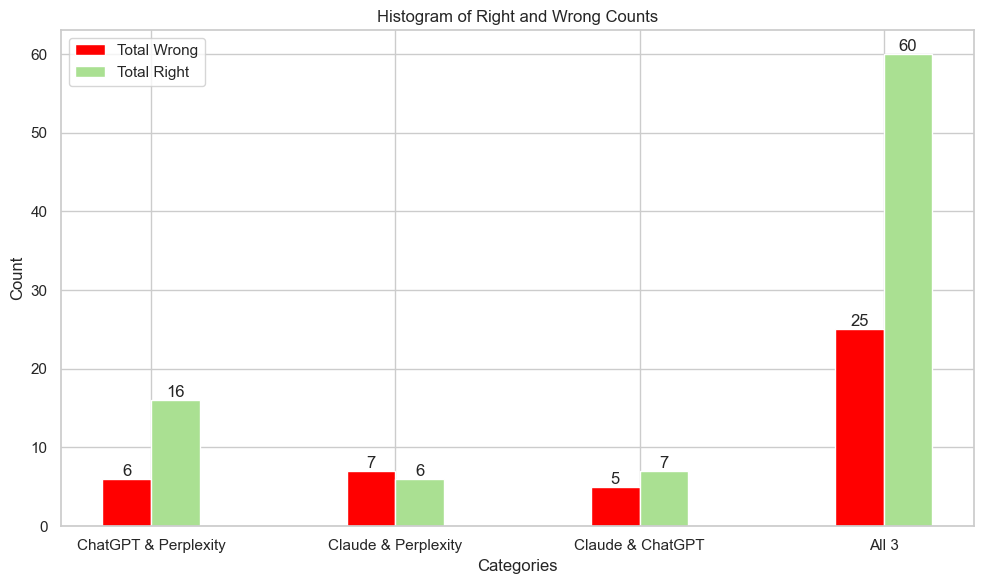

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
categories = ["ChatGPT & Perplexity", "Claude & Perplexity", "Claude & ChatGPT", "All 3"]
total_wrong = [6, 7, 5, 25]
total_right = [16, 6, 7, 60]

# Bar positions
x = np.arange(len(categories))

# Bar width
bar_width = 0.2

# Colors for the bars using HTML color codes
wrong_color = '#FF0000'  # Red for "Total Wrong"
right_color = '#AAE092'  # Green for "Total Right"

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - bar_width/2, total_wrong, bar_width, label="Total Wrong", color=wrong_color)
bars2 = ax.bar(x + bar_width/2, total_right, bar_width, label="Total Right", color=right_color)

# Adding labels, title, and legend
ax.set_xlabel("Categories")
ax.set_ylabel("Count")
ax.set_title("Histogram of Right and Wrong Counts")
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Adding value annotations
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()
